In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from dedalus import public as de
from dedalus.extras import plot_tools

from bretherton_tools import create_domain, make_solver, x_velocities, surface_grid
from bretherton_tools import meridional_grid, interpolated_x_velocities

In [2]:
domain = create_domain()
solver = make_solver(domain)

2020-04-09 17:52:15,901 pencil 0/1 INFO :: Building pencil matrix 1/496 (~0%) Elapsed: 0s, Remaining: 3s, Rate: 1.9e+02/s
2020-04-09 17:52:16,226 pencil 0/1 INFO :: Building pencil matrix 50/496 (~10%) Elapsed: 0s, Remaining: 3s, Rate: 1.5e+02/s
2020-04-09 17:52:16,558 pencil 0/1 INFO :: Building pencil matrix 100/496 (~20%) Elapsed: 1s, Remaining: 3s, Rate: 1.5e+02/s
2020-04-09 17:52:16,910 pencil 0/1 INFO :: Building pencil matrix 150/496 (~30%) Elapsed: 1s, Remaining: 2s, Rate: 1.5e+02/s
2020-04-09 17:52:17,263 pencil 0/1 INFO :: Building pencil matrix 200/496 (~40%) Elapsed: 1s, Remaining: 2s, Rate: 1.5e+02/s
2020-04-09 17:52:17,608 pencil 0/1 INFO :: Building pencil matrix 250/496 (~50%) Elapsed: 2s, Remaining: 2s, Rate: 1.5e+02/s
2020-04-09 17:52:17,963 pencil 0/1 INFO :: Building pencil matrix 300/496 (~60%) Elapsed: 2s, Remaining: 1s, Rate: 1.5e+02/s
2020-04-09 17:52:18,321 pencil 0/1 INFO :: Building pencil matrix 350/496 (~71%) Elapsed: 2s, Remaining: 1s, Rate: 1.4e+02/s
2020

NameError: name 'ulim' is not defined

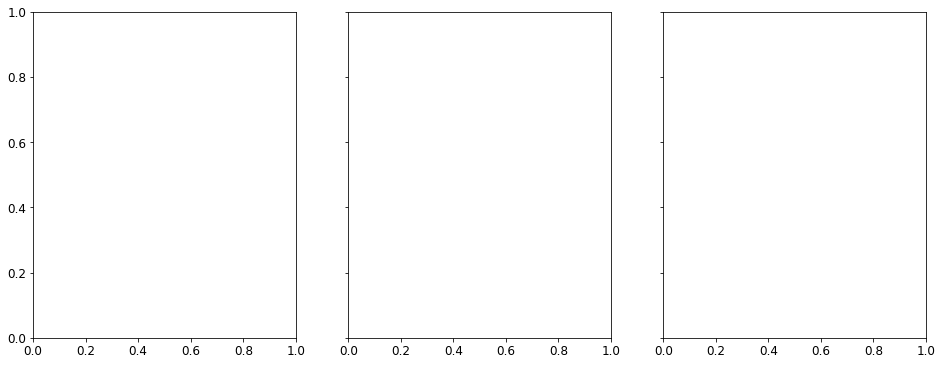

In [3]:
US = solver.problem.parameters['US']

X, Y = meridional_grid(solver, scale=4)

ψL_surface, uL_surface, uM_surface, uS_surface = interpolated_x_velocities(solver, scale=4, z=0)

# Plot solution
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=3, figsize=(16, 6), sharey=True) 

levs = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.02, 
                 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * US

plt.sca(axs[0])

im0 = plt.contourf(X, Y, uS_surface['g'][:, :, -1].T / US, cmap="RdBu_r", 
                  levels=levs, vmin=-ulim, vmax=ulim)

plt.sca(axs[1])

im0 = plt.contourf(X, Y, uL_surface['g'][:, :, -1].T / US, cmap="RdBu_r", 
                  levels=levs, vmin=-ulim, vmax=ulim)

plt.contour(X, Y, ψL_surface['g'][:, :, -1].T, levels=np.linspace(-ψmax, ψmax, num=6), 
            colors="k", alpha=0.2)

plt.sca(axs[2])
im1 = plt.contourf(X, Y, uM_surface['g'][:, :, -1].T / US, cmap="RdBu_r",
                   levels=levs, vmin=-ulim, vmax=ulim)

cb = plt.colorbar(im1, ax=axs.ravel().tolist(), shrink=0.95, aspect=50, orientation="horizontal")

axs[0].set_aspect(1)
axs[1].set_aspect(1)
axs[2].set_aspect(1)

plt.text(0.04, 0.04, '$ u \, |_{t=0} = u^\\mathrm{S} $', horizontalalignment='left',
         verticalalignment='bottom', transform=axs[0].transAxes, fontsize=16)

plt.text(0.04, 0.04, '$ \\tilde u $', horizontalalignment='left',
         verticalalignment='bottom', transform=axs[1].transAxes, fontsize=16)

plt.text(0.04, 0.04, '$ u^\\dagger = u^\\mathrm{S} - \\tilde u $', horizontalalignment='left',
         verticalalignment='bottom', transform=axs[2].transAxes, fontsize=16)

#axs[0].set_title("$ u^{\\mathrm{S}} $")
#axs[1].set_title("$ \\tilde{u} $")
#axs[2].set_title("$ u^\\dagger = u^{\\mathrm{S}} - \\tilde{u}$")

axs[0].tick_params(left=False, labelleft=False)

for ax in axs:
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
plt.pause(0.1)

plt.gcf()
plt.savefig('wave_induced_mediated.png', bbox_inches='tight', dpi=480)